In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px


In [130]:
df = pd.read_csv('weatherAUS.csv')
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<Axes: >

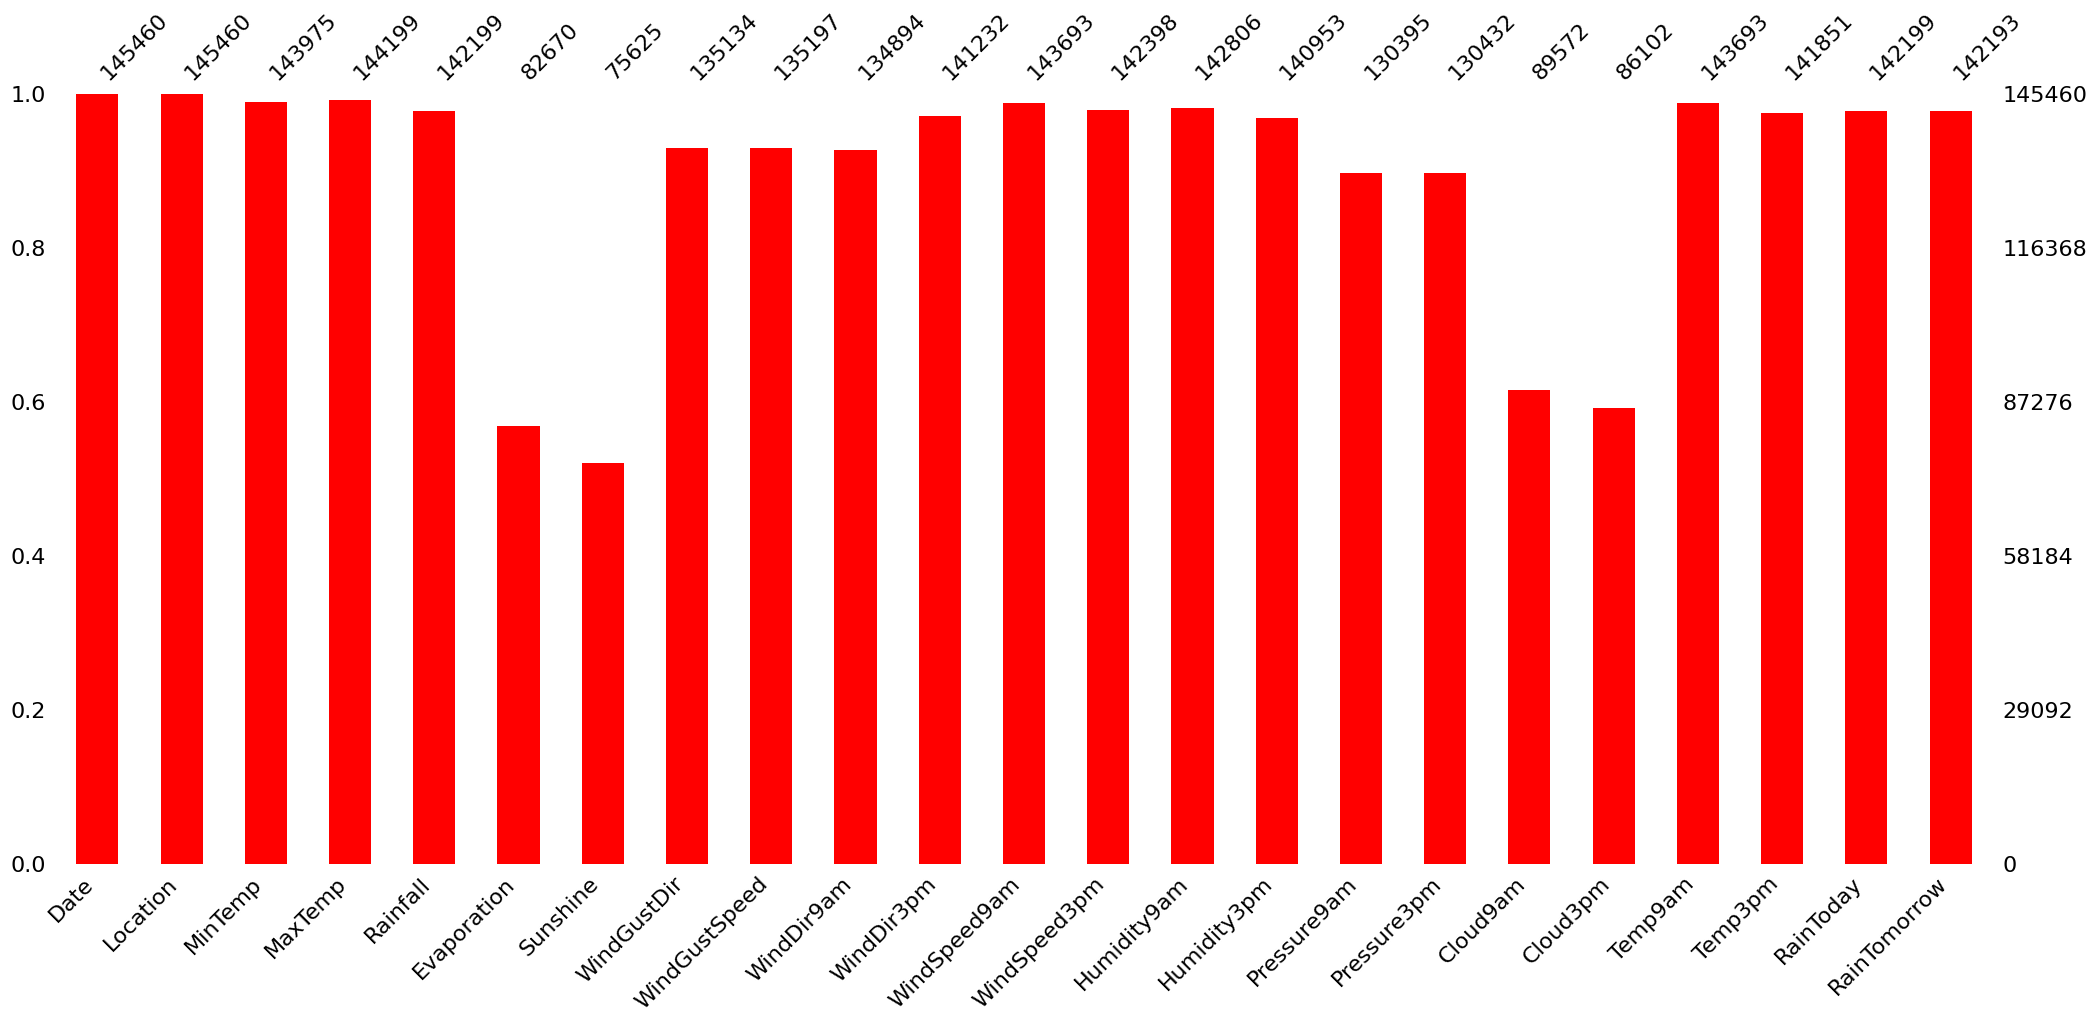

In [132]:
msno.bar(df, color="red")

In [133]:
# Handle Missing Values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [134]:
def random_sample_imputation(df, variable):
    # Ensure the column exists in the dataframe
    if variable not in df.columns:
        raise ValueError(f"Column '{variable}' does not exist in the dataframe")

    # Drop missing values and sample from the non-missing values
    non_missing = df[variable].dropna()
    n_missing = df[variable].isnull().sum()

    # Sample random values from the non-missing data
    random_sample = non_missing.sample(n_missing, random_state=0, replace=True)

    # Assign the sampled values to the missing positions
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample


In [135]:
random_sample_imputation(df, "Cloud9am")
random_sample_imputation(df, "Cloud3pm")
random_sample_imputation(df, "Evaporation")
random_sample_imputation(df, "Sunshine")

In [136]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.2,9.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.6,11.9,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,2.0,8.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.0,9.9,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,6.2,9.7,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,1.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.6,10.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,3.6,10.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,6.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,3.4,10.2,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,7.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.6,0.9,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,1.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,3.4,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


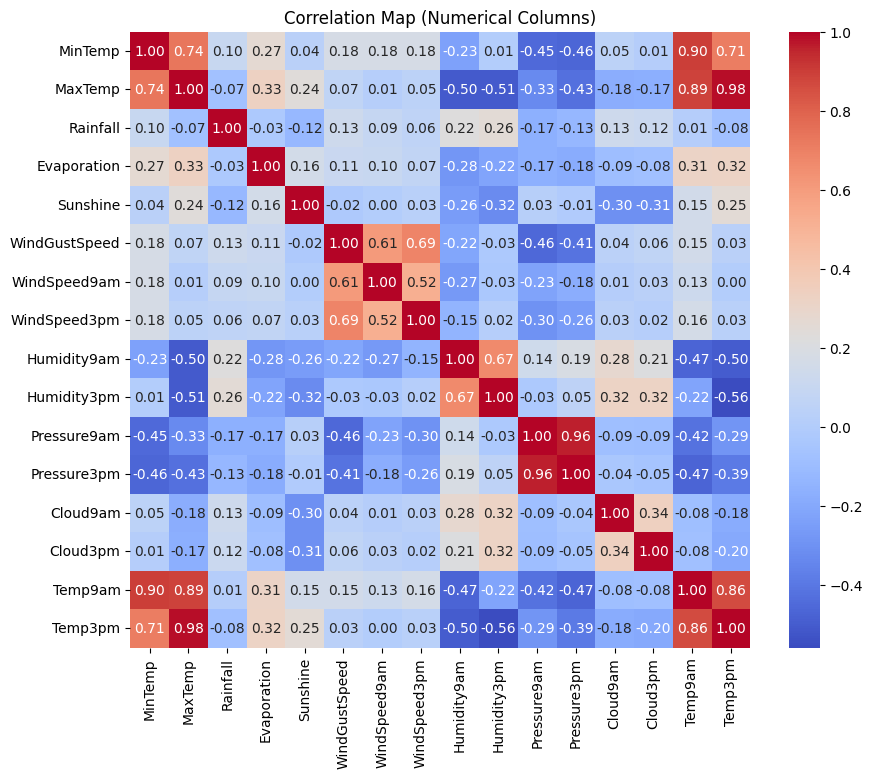

In [137]:

numerical_cols = df.select_dtypes(include=['float', 'int']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map (Numerical Columns)')
plt.show()


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


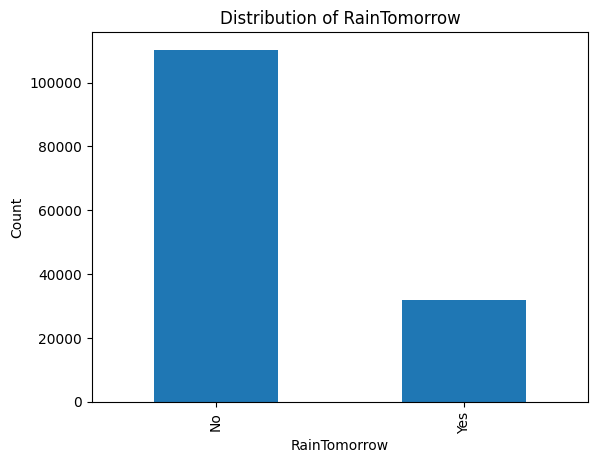

In [138]:

target_counts = df['RainTomorrow'].value_counts()

# Print the counts and visualize
print(target_counts)
target_counts.plot(kind='bar')
plt.title('Distribution of RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()


<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


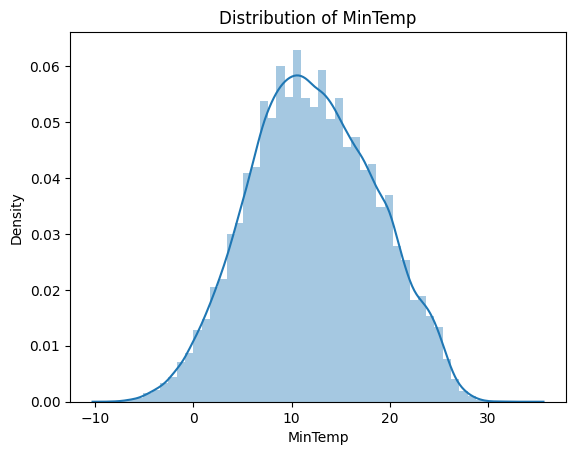

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


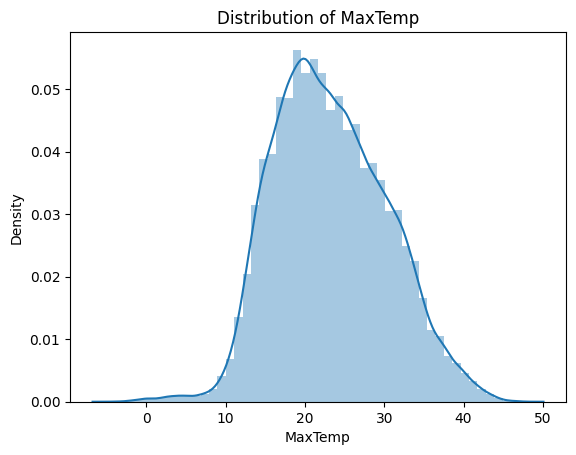

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


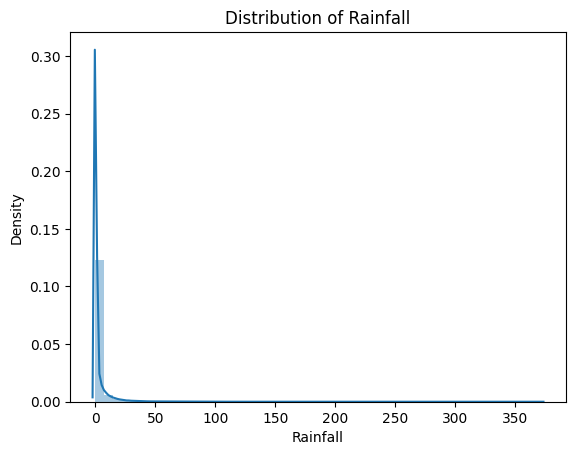

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


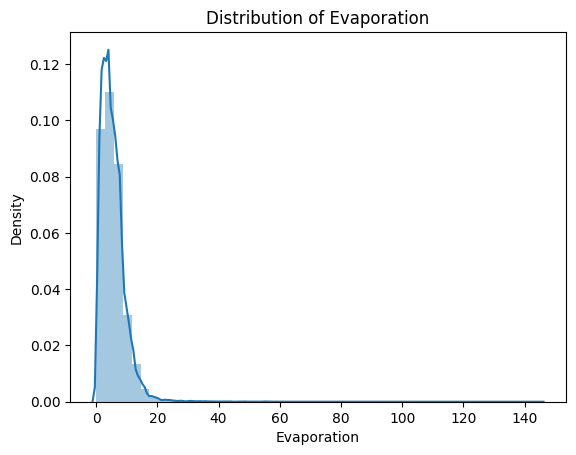

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


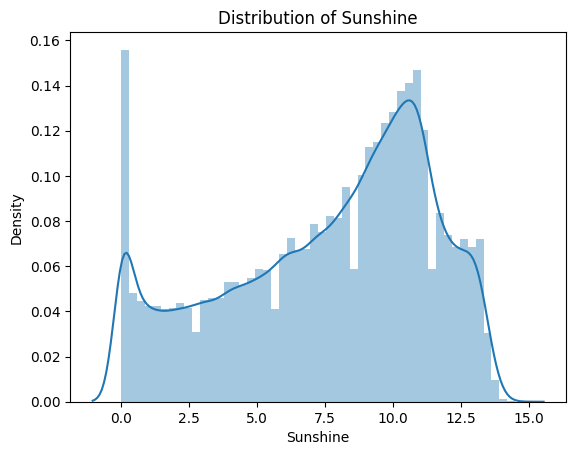

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


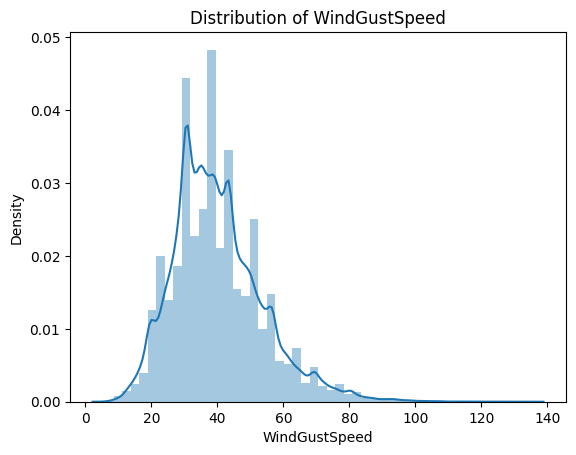

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


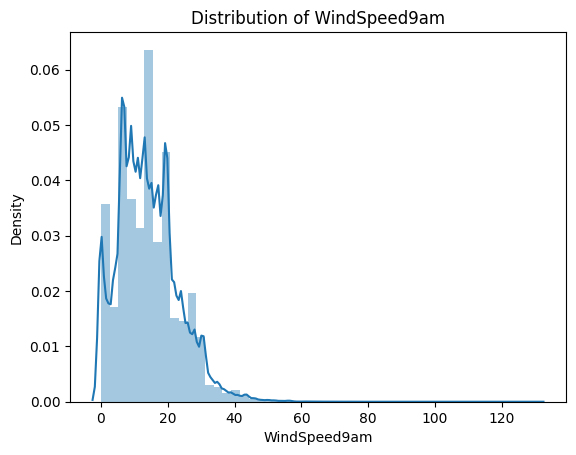

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


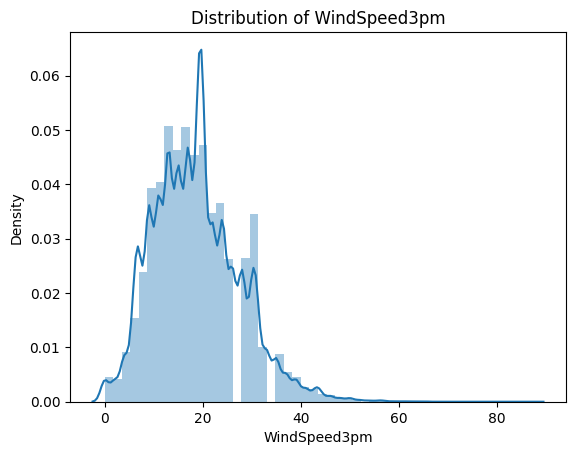

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


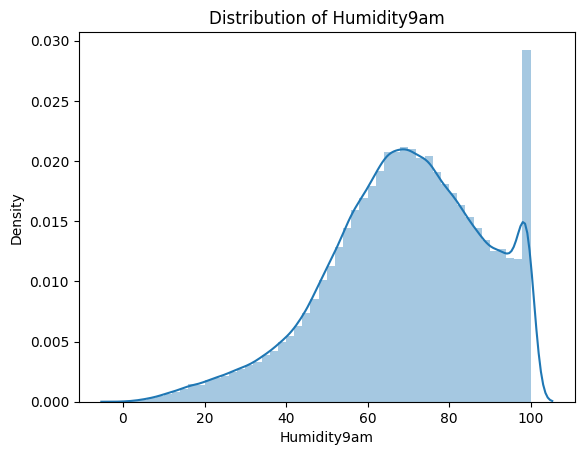

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


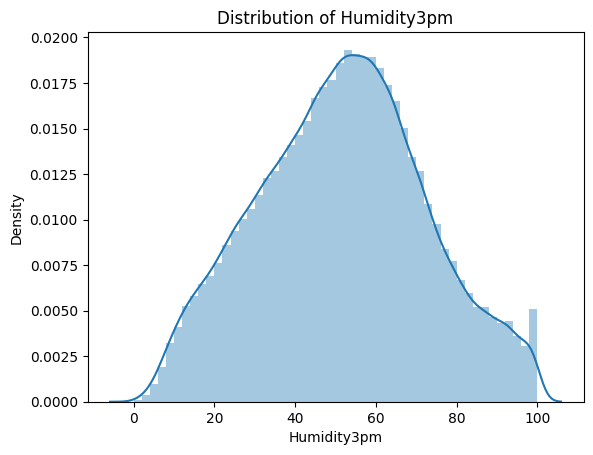

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


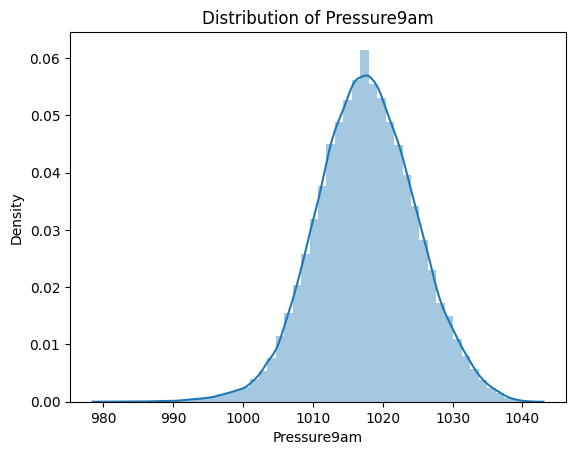

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


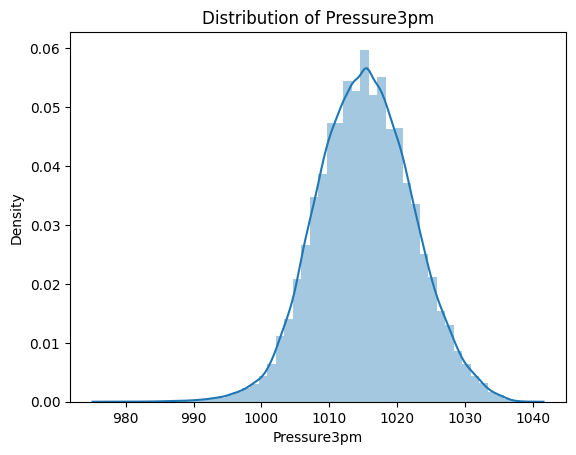

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


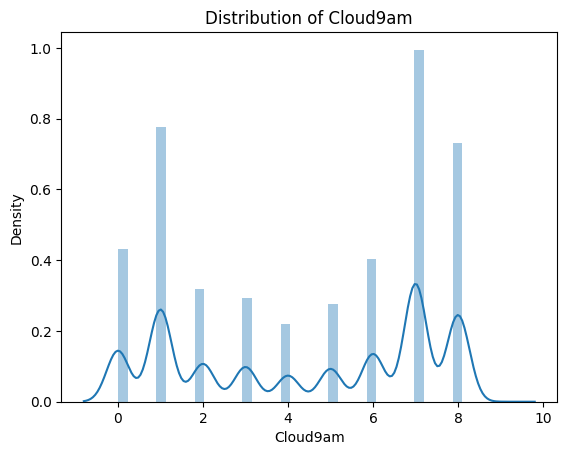

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


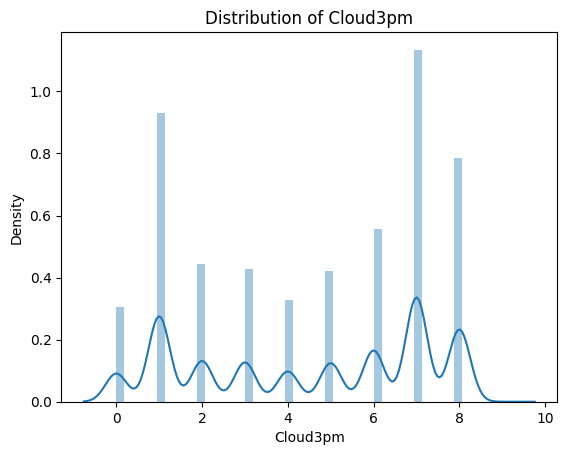

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


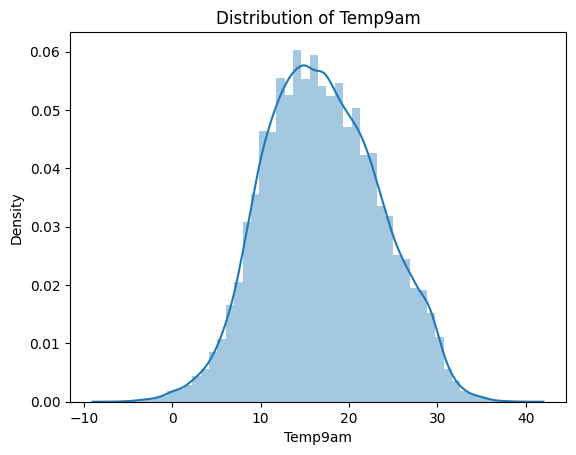

<ipython-input-139-61bf1e35a547>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)


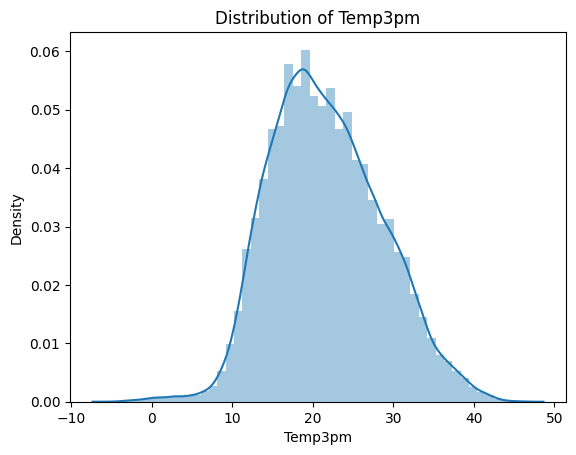

In [139]:

for col in numerical_cols:
  plt.figure()
  sns.distplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()


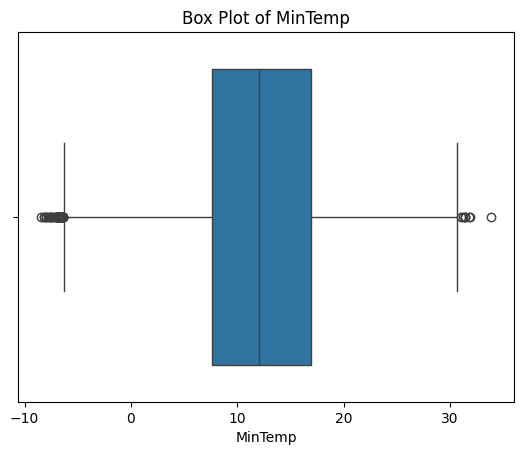

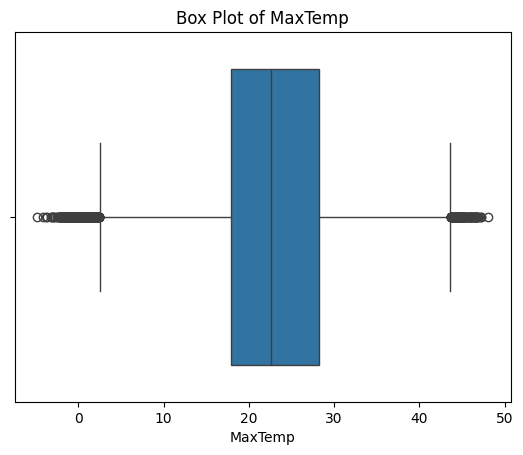

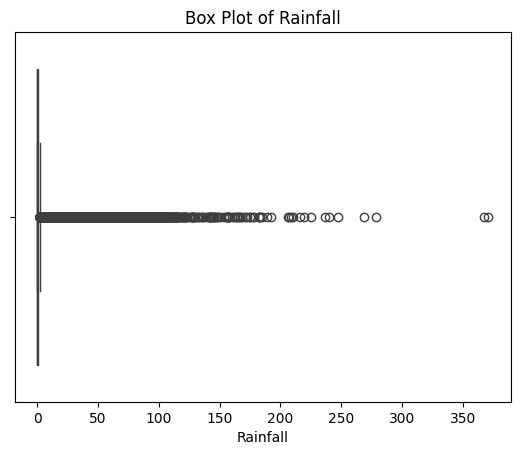

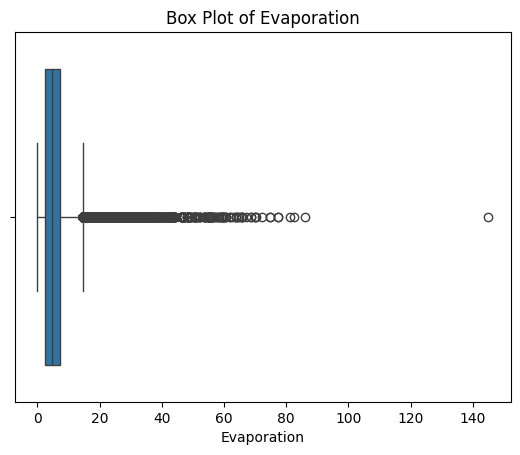

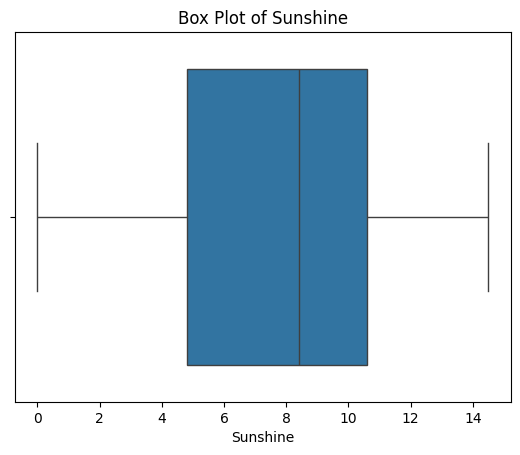

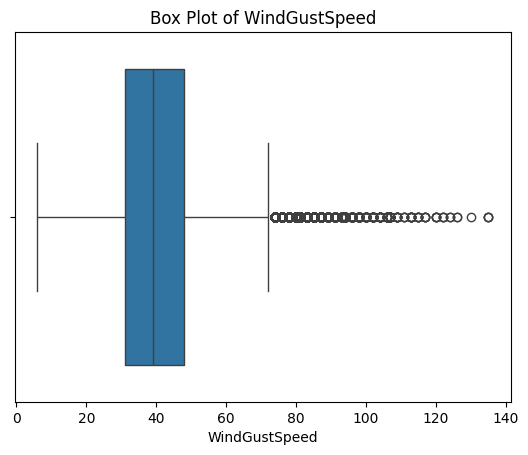

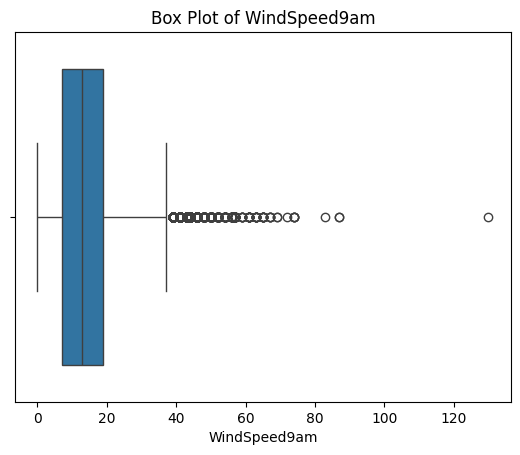

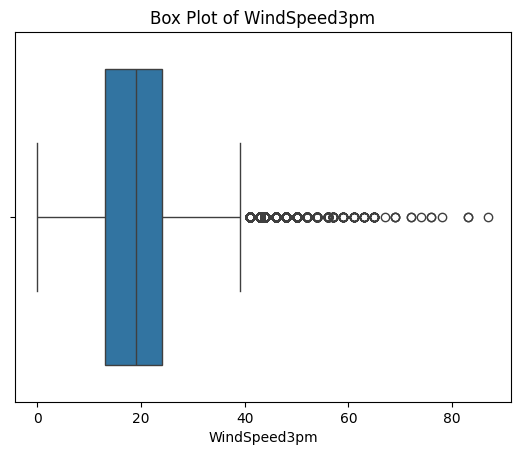

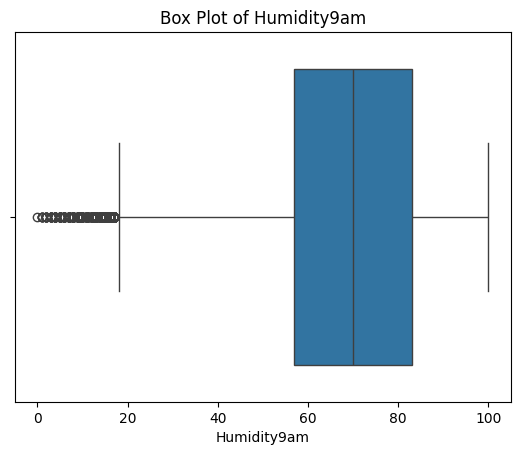

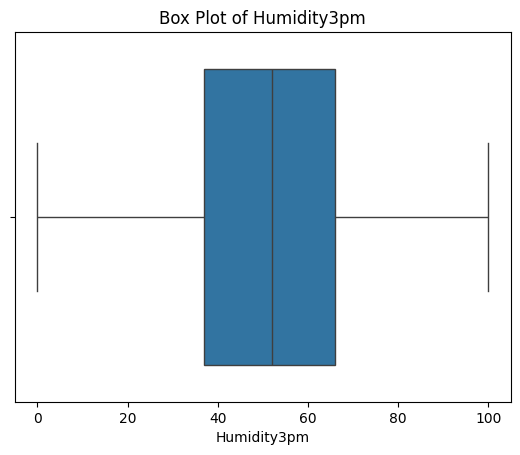

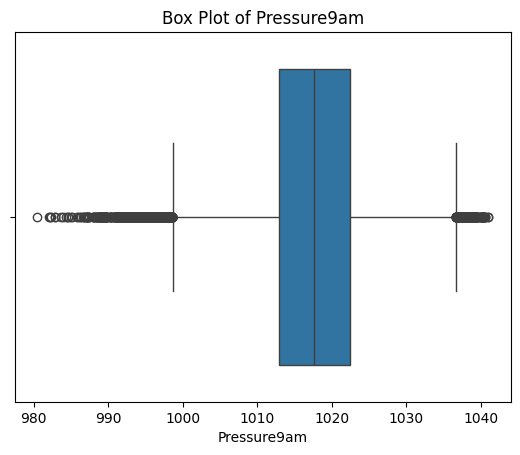

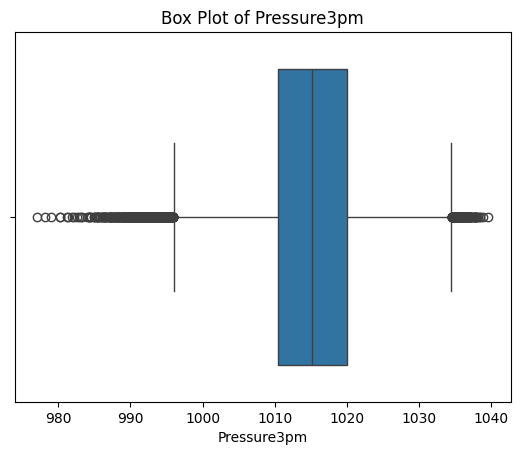

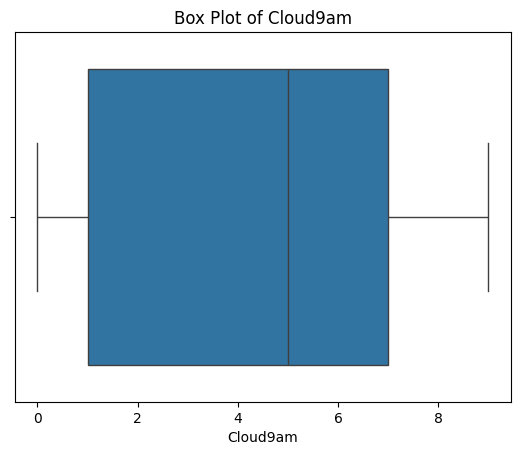

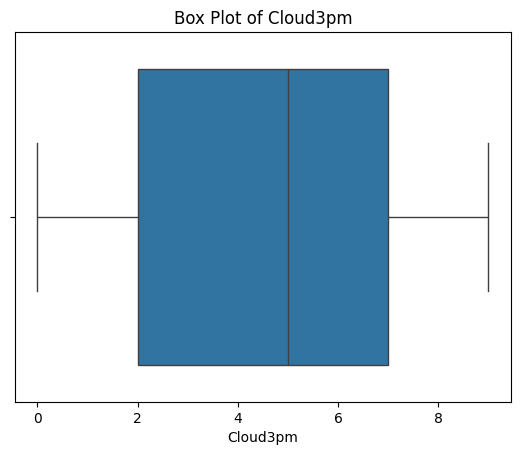

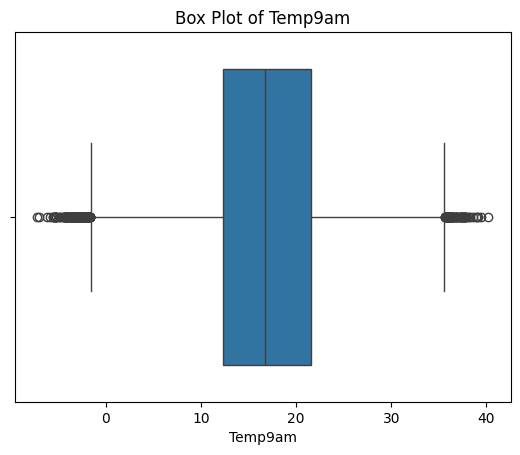

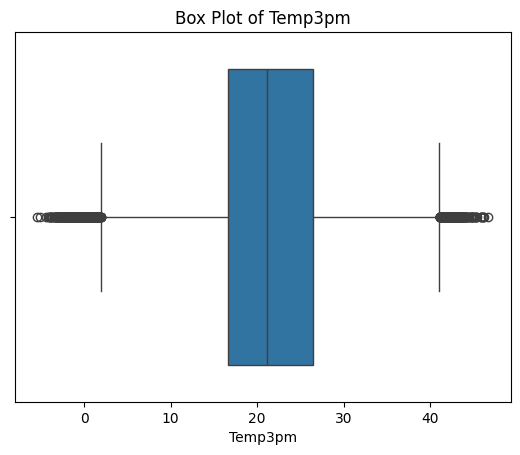

In [140]:

for column in numerical_cols:
  plt.figure()
  sns.boxplot(x=df[column])
  plt.title(f"Box Plot of {column}")
  plt.show()


In [141]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [142]:

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


print(df.isnull().sum())


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [143]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,0.2,9.8,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,2.6,11.9,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,2.0,8.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,2.0,9.9,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,6.2,9.7,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,7.0,1.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,3.6,10.9,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,3.6,10.4,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,1.0,6.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,3.4,10.2,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,7.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,0.6,0.9,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,1.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,3.4,0.0,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [145]:
categorical_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [146]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in categorical_cols:
    df[column] = le.fit_transform(df[column])
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.900000,0.6,0.2,9.8,13,44.00000,13,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,0,0
1,397,2,7.4,25.100000,0.0,2.6,11.9,14,44.00000,6,...,44.0,25.0,1010.6,1007.8,2.0,8.0,17.2,24.3,0,0
2,398,2,12.9,25.700000,0.0,2.0,9.9,15,46.00000,13,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,399,2,9.2,28.000000,0.0,6.2,9.7,4,24.00000,9,...,45.0,16.0,1017.6,1012.8,7.0,1.0,18.1,26.5,0,0
4,400,2,17.5,32.300000,1.0,3.6,10.9,13,41.00000,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,2.8,23.400000,0.0,3.6,10.4,0,31.00000,9,...,51.0,24.0,1024.6,1020.3,1.0,6.0,10.1,22.4,0,0
145456,3432,41,3.6,25.300000,0.0,3.4,10.2,6,22.00000,9,...,56.0,21.0,1023.5,1019.1,7.0,5.0,10.9,24.5,0,0
145457,3433,41,5.4,26.900000,0.0,0.6,0.9,3,37.00000,9,...,53.0,24.0,1021.0,1016.8,1.0,1.0,12.5,26.1,0,0
145458,3434,41,7.8,27.000000,0.0,3.4,0.0,9,28.00000,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [148]:
df.drop(['Date'], axis=1, inplace=True)


In [149]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Number of outliers per column:\n", outliers)




Number of outliers per column:
 Location             0
MinTemp              0
MaxTemp              0
Rainfall         18421
Evaporation        870
Sunshine             0
WindGustDir          0
WindGustSpeed      405
WindDir9am           0
WindDir3pm           0
WindSpeed9am       114
WindSpeed3pm        82
Humidity9am          0
Humidity3pm          0
Pressure9am         40
Pressure3pm         35
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday        31880
RainTomorrow     31877
dtype: int64


In [150]:
# Remove outliers (optional, depends on your data and analysis goals)
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("\nShape of original DataFrame:", df.shape)
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)


Shape of original DataFrame: (145460, 22)
Shape of DataFrame after removing outliers: (95508, 22)


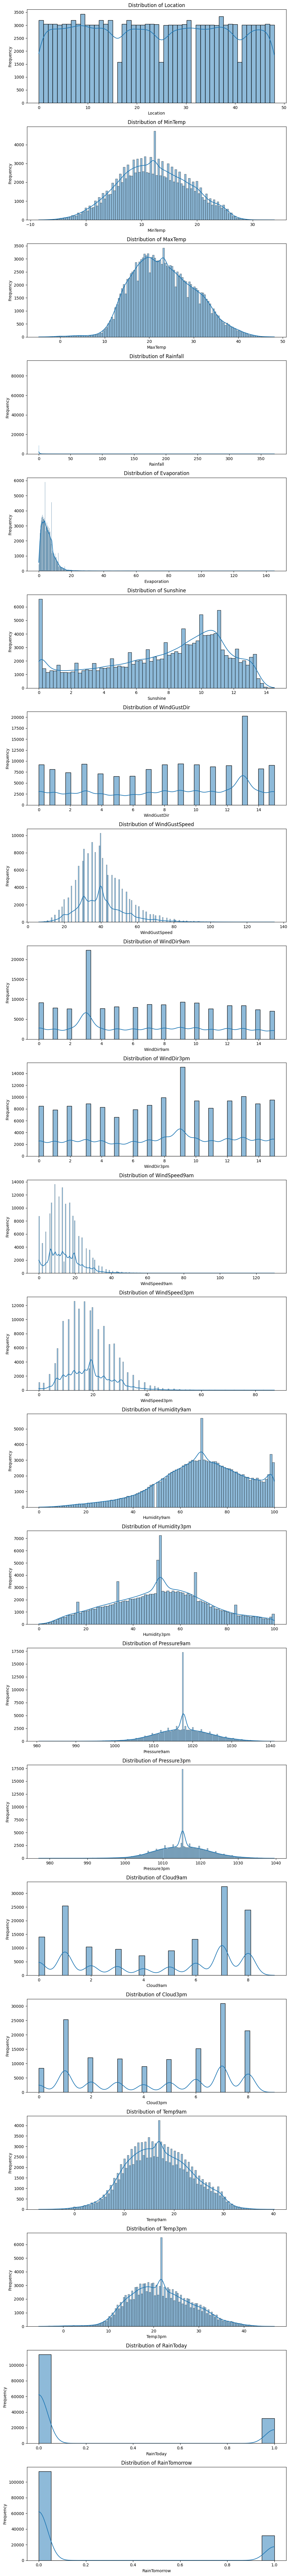

In [151]:

numerical_cols = df.select_dtypes(include=['float', 'int']).columns
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 4 * len(numerical_cols)))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
  sns.histplot(df[col], kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


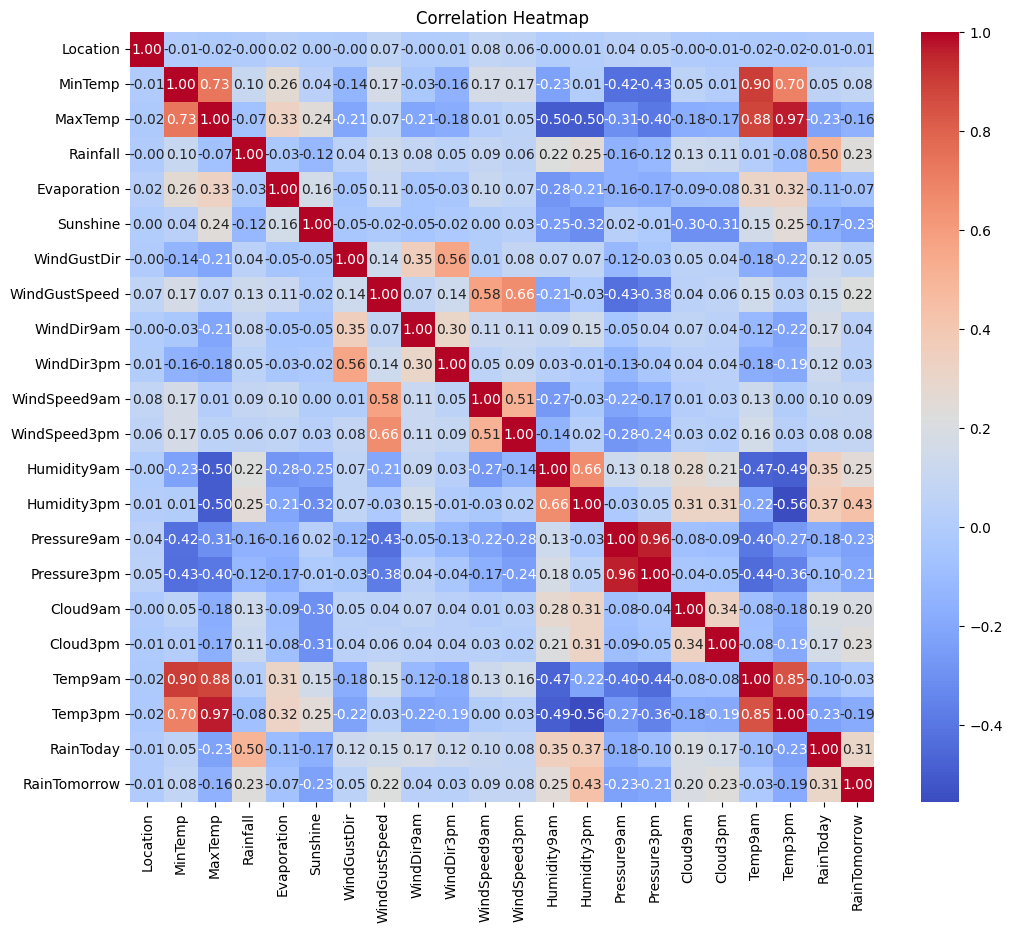

In [152]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


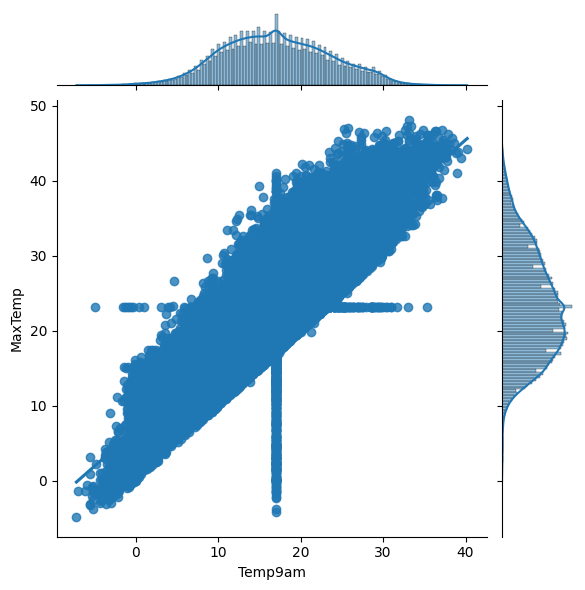

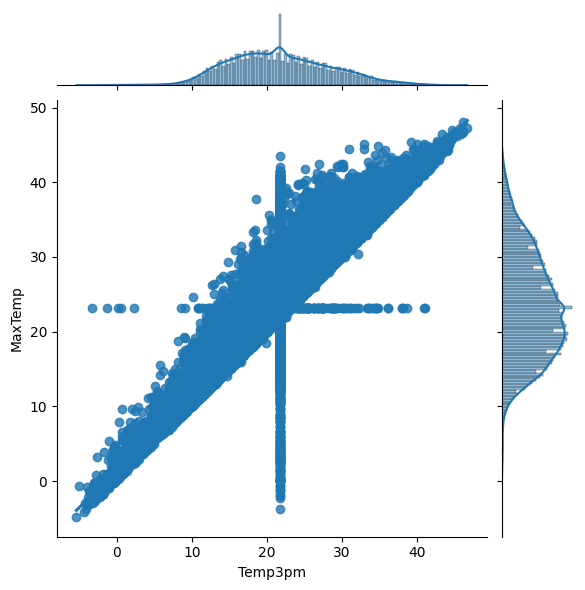

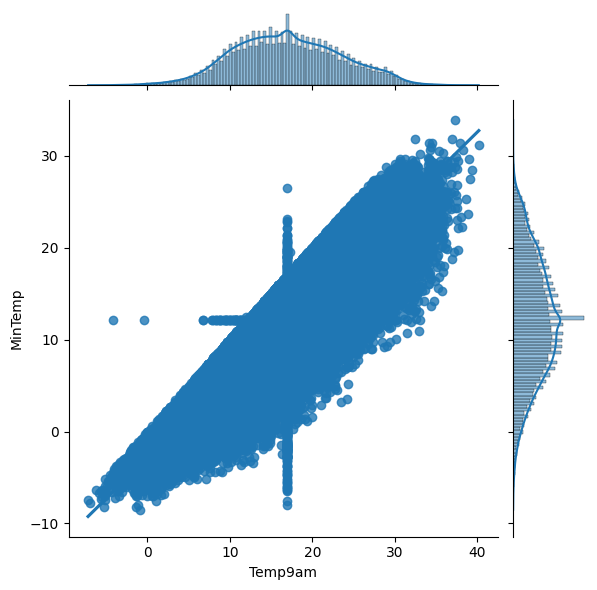

In [153]:
sns.jointplot(data=df, x="Temp9am", y="MaxTemp", kind="reg")
sns.jointplot(data=df, x="Temp3pm", y="MaxTemp", kind="reg")
sns.jointplot(data=df, x="Temp9am", y="MinTemp", kind="reg")

In [154]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]

In [155]:

from imblearn.over_sampling import SMOTE
X_reshaped = X.values.reshape(X.shape[0], X.shape[1])
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_reshaped, Y)

In [156]:
from collections import Counter
print("Original dataset shape {}".format(Counter(Y)))
print("Resampled dataset shape {}".format(Counter(y_res)))


Original dataset shape Counter({0: 113583, 1: 31877})
Resampled dataset shape Counter({0: 113583, 1: 113583})


In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [159]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((116368, 21), (116368,), (29092, 21), (29092,))

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.837859205279802

Confusion Matrix: 
 [[21464  1253]
 [ 3464  2911]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     22717
           1       0.70      0.46      0.55      6375

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.83      0.84      0.82     29092



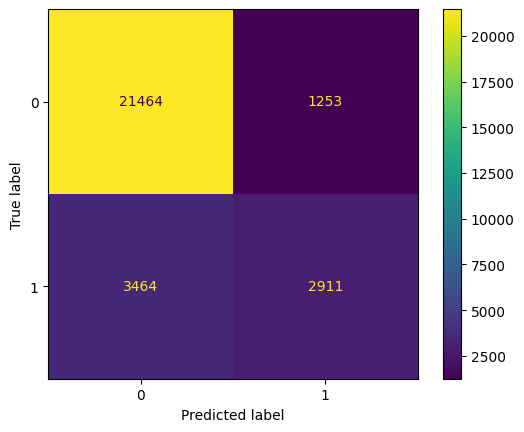

In [161]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()


Random Forest Accuracy Score:  0.8525367798707548

Confusion Matrix: 
 [[21689  1028]
 [ 3262  3113]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.75      0.49      0.59      6375

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



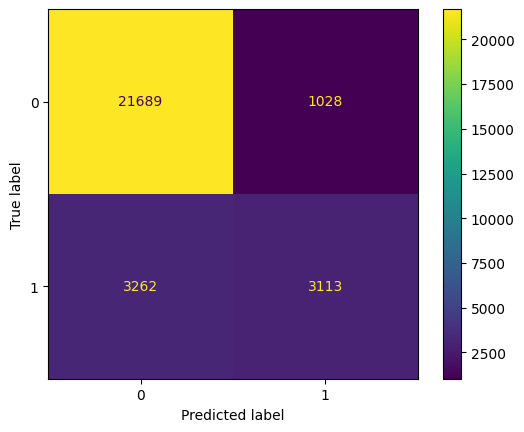

In [162]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report: \n", classification_report(y_test, y_pred_rf))

# Display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()
plt.show()


ID3 Accuracy Score:  0.7847518218066822

Confusion Matrix: 
 [[19554  3163]
 [ 3099  3276]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     22717
           1       0.51      0.51      0.51      6375

    accuracy                           0.78     29092
   macro avg       0.69      0.69      0.69     29092
weighted avg       0.79      0.78      0.79     29092



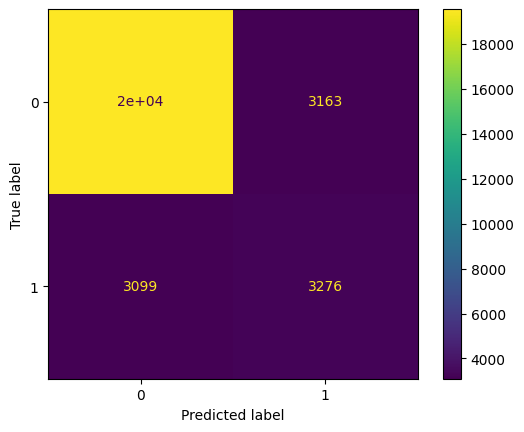

In [163]:


from sklearn.tree import DecisionTreeClassifier
id3_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
id3_model.fit(X_train, y_train)
y_pred_id3 = id3_model.predict(X_test)

# Evaluate the model
print("ID3 Accuracy Score: ", accuracy_score(y_test, y_pred_id3))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_id3))
print("\nClassification Report: \n", classification_report(y_test, y_pred_id3))

# Display confusion matrix
cm_id3 = confusion_matrix(y_test, y_pred_id3)
disp_id3 = ConfusionMatrixDisplay(confusion_matrix=cm_id3, display_labels=id3_model.classes_)
disp_id3.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hybrid Model Accuracy Score:  0.8483775608414684

Confusion Matrix: 
 [[21640  1077]
 [ 3334  3041]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.74      0.48      0.58      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.84      0.85      0.84     29092



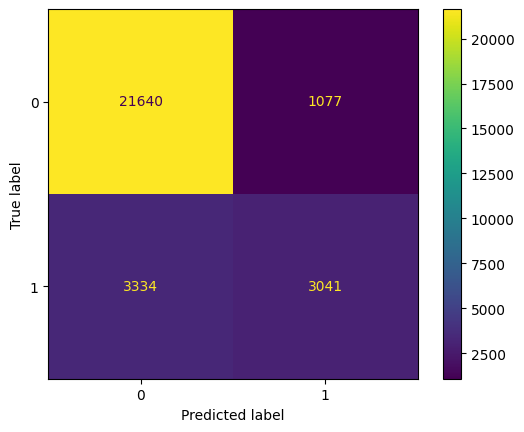

In [164]:
# prompt: Create A Hybrid Model for random forest and logistic regressiom

from sklearn.ensemble import VotingClassifier

# Create the individual models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)

# Create the hybrid model
hybrid_model = VotingClassifier(estimators=[('lr', logreg_model), ('rf', rf_model)], voting='soft')

# Fit the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions
y_pred_hybrid = hybrid_model.predict(X_test)

# Evaluate the hybrid model
print("Hybrid Model Accuracy Score: ", accuracy_score(y_test, y_pred_hybrid))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_hybrid))
print("\nClassification Report: \n", classification_report(y_test, y_pred_hybrid))

# Display confusion matrix
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
disp_hybrid = ConfusionMatrixDisplay(confusion_matrix=cm_hybrid, display_labels=hybrid_model.classes_)
disp_hybrid.plot()
plt.show()



In [165]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)  # Convert probabilities to binary predictions

print("CNN Accuracy Score: ", accuracy_score(y_test, y_pred_cnn))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_cnn))
print("\nClassification Report: \n", classification_report(y_test, y_pred_cnn))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3637/3637 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7852 - loss: 0.7763
Epoch 2/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8228 - loss: 0.4246
Epoch 3/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8355 - loss: 0.3854
Epoch 4/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8378 - loss: 0.3783
Epoch 5/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8371 - loss: 0.3787
Epoch 6/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8398 - loss: 0.3748
Epoch 7/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8420 - loss: 0.3717
Epoch 8/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8401 - loss: 0.3703
Epoch 9/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8399 - loss: 0.3711
Epoch 10/10
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8417 - loss: 0.3684
910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
CNN Accuracy Score:  0.8430152619276777

Confusion Matrix: 
 [[21472  1245]
 [ 

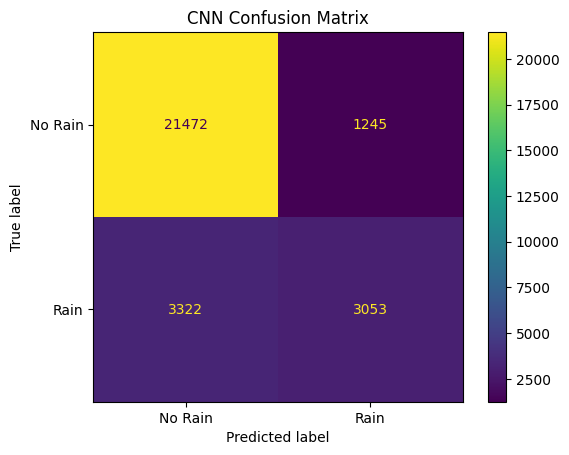

In [166]:

cm_cnn = confusion_matrix(y_test, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=['No Rain', 'Rain'])
disp_cnn.plot()
plt.title('CNN Confusion Matrix')
plt.show()


In [167]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

X = df.drop(columns=['RainTomorrow']).values
y = df['RainTomorrow'].values

# Reshape the data for LSTM input (assuming you want to treat features as a sequence)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model based on the given architecture
model = keras.Sequential(
    [
        keras.Input(shape=(X.shape[1], 1)),  # Input shape for LSTM
        layers.Conv1D(filters=32, kernel_size=3, activation='relu'),  # Conv1D layer
        layers.MaxPooling1D(pool_size=2),  # MaxPooling1D layer
        layers.Dropout(0.5),  # Dropout layer
        layers.LSTM(units=50, return_sequences=True),  # LSTM layer with return sequences
        layers.LSTM(units=50),  # Another LSTM layer
        layers.Dense(units=1, activation="sigmoid"),  # Output layer for binary classification
    ]
)

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Accuracy: {accuracy}")

# Make predictions
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_lstm))
print(confusion_matrix(y_test, y_pred_lstm))

Epoch 1/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.7880 - loss: 0.4787 - val_accuracy: 0.7871 - val_loss: 0.4880
Epoch 2/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8212 - loss: 0.4091 - val_accuracy: 0.7972 - val_loss: 0.4613
Epoch 3/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.8272 - loss: 0.3993 - val_accuracy: 0.7875 - val_loss: 0.5033
Epoch 4/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8307 - loss: 0.3937 - val_accuracy: 0.7839 - val_loss: 0.5205
Epoch 5/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.8307 - loss: 0.3933 - val_accuracy: 0.7910 - val_loss: 0.5298
Epoch 6/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.8331 - loss: 0.3887 - val_accuracy: 0.7846 - val_loss: 0.5058
Epoch 7/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8329 - loss: 0.3878 - val_accuracy: 0.7840 - val_loss: 0.5474
Epoch 8/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8339 -

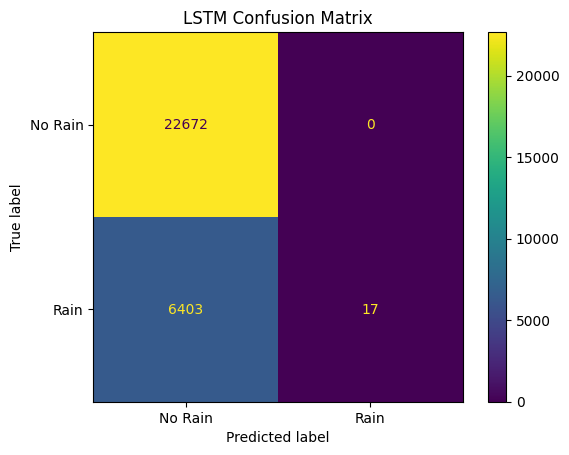

In [168]:
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['No Rain', 'Rain'])
disp_lstm.plot()
plt.title('LSTM Confusion Matrix')
plt.show()


In [178]:
from scipy.stats import mode
y_pred_cnn = y_pred_cnn.reshape(-1)
y_pred_lstm = y_pred_lstm.reshape(-1)
# Combine predictions
predictions = np.vstack((y_pred_cnn, y_pred_lstm)).T
y_pred_ensemble, _ = mode(predictions, axis=1)
y_pred_ensemble = y_pred_ensemble.flatten()

# , y_pred_id3,y_pred_cnn, y_pred_lstm, y_pred, y_pred_cnn, y_pred_lstm
# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy}")

# Evaluate the ensemble model
print("Ensemble Accuracy Score: ", accuracy_score(y_test, y_pred_ensemble))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report: \n", classification_report(y_test, y_pred_ensemble))

Ensemble Model Accuracy: 0.7793895228928915
Ensemble Accuracy Score:  0.7793895228928915

Confusion Matrix: 
 [[22672     0]
 [ 6418     2]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     22672
           1       1.00      0.00      0.00      6420

    accuracy                           0.78     29092
   macro avg       0.89      0.50      0.44     29092
weighted avg       0.83      0.78      0.68     29092

